___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [2]:
df = pd.read_csv("cement_slump.csv")

# EDA and Graphical analysis

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,103.000,229.894,78.877,137.000,152.000,248.000,303.900,374.000
Slag,103.000,77.974,60.461,0.000,0.050,100.000,125.000,193.000
Fly ash,103.000,149.015,85.418,0.000,115.500,164.000,235.950,260.000
Water,103.000,197.168,20.208,160.000,180.000,196.000,209.500,240.000
SP,103.000,8.540,2.808,4.400,6.000,8.000,10.000,19.000
Coarse Aggr.,103.000,883.979,88.391,708.000,819.500,879.000,952.800,1049.900
Fine Aggr.,103.000,739.605,63.342,640.600,684.500,742.700,788.000,902.000
SLUMP(cm),103.000,18.049,8.751,0.000,14.500,21.500,24.000,29.000
FLOW(cm),103.000,49.611,17.569,20.000,38.500,54.000,63.750,78.000
Compressive Strength (28-day)(Mpa),103.000,36.039,7.837,17.190,30.900,35.520,41.205,58.530


In [7]:
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000,-0.244,-0.487,0.221,-0.106,-0.310,0.057,0.146,0.186,0.446
Slag,-0.244,1.000,-0.323,-0.027,0.307,-0.224,-0.184,-0.284,-0.327,-0.332
Fly ash,-0.487,-0.323,1.000,-0.241,-0.144,0.173,-0.283,-0.119,-0.055,0.444
Water,0.221,-0.027,-0.241,1.000,-0.155,-0.602,0.115,0.467,0.632,-0.254
SP,-0.106,0.307,-0.144,-0.155,1.000,-0.104,0.058,-0.213,-0.176,-0.038
Coarse Aggr.,-0.310,-0.224,0.173,-0.602,-0.104,1.000,-0.489,-0.188,-0.326,-0.161
Fine Aggr.,0.057,-0.184,-0.283,0.115,0.058,-0.489,1.000,0.202,0.190,-0.155
SLUMP(cm),0.146,-0.284,-0.119,0.467,-0.213,-0.188,0.202,1.000,0.906,-0.223
FLOW(cm),0.186,-0.327,-0.055,0.632,-0.176,-0.326,0.190,0.906,1.000,-0.124
Compressive Strength (28-day)(Mpa),0.446,-0.332,0.444,-0.254,-0.038,-0.161,-0.155,-0.223,-0.124,1.000


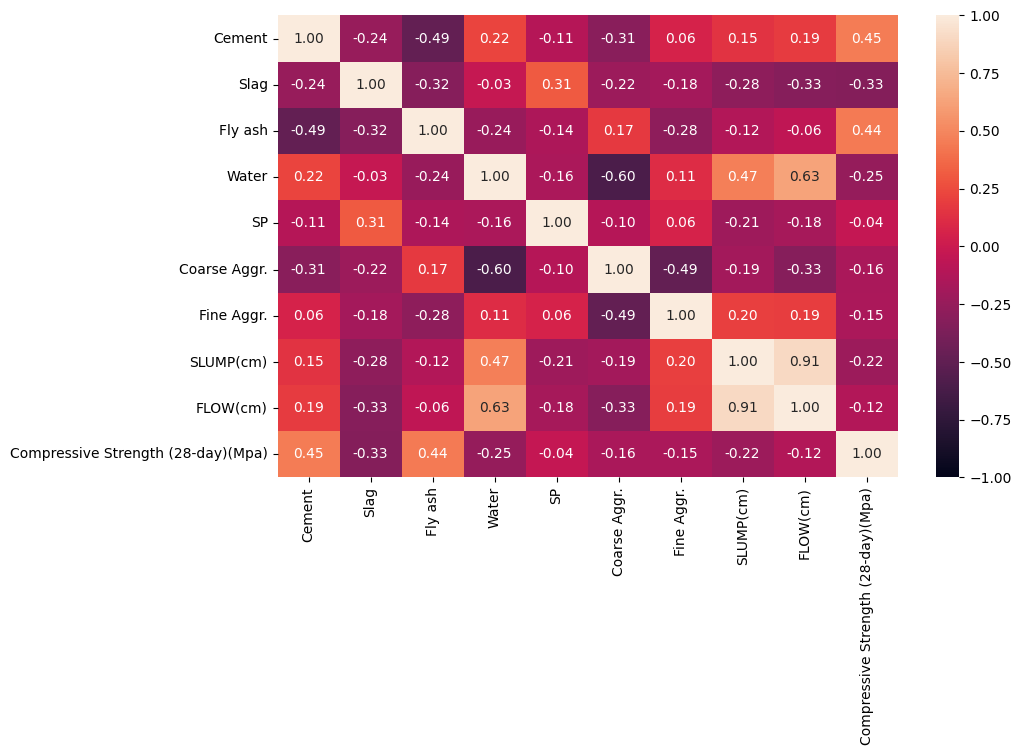

In [9]:
sns.heatmap(df.corr(), annot = True, fmt=".2f", vmin=-1, vmax=1);

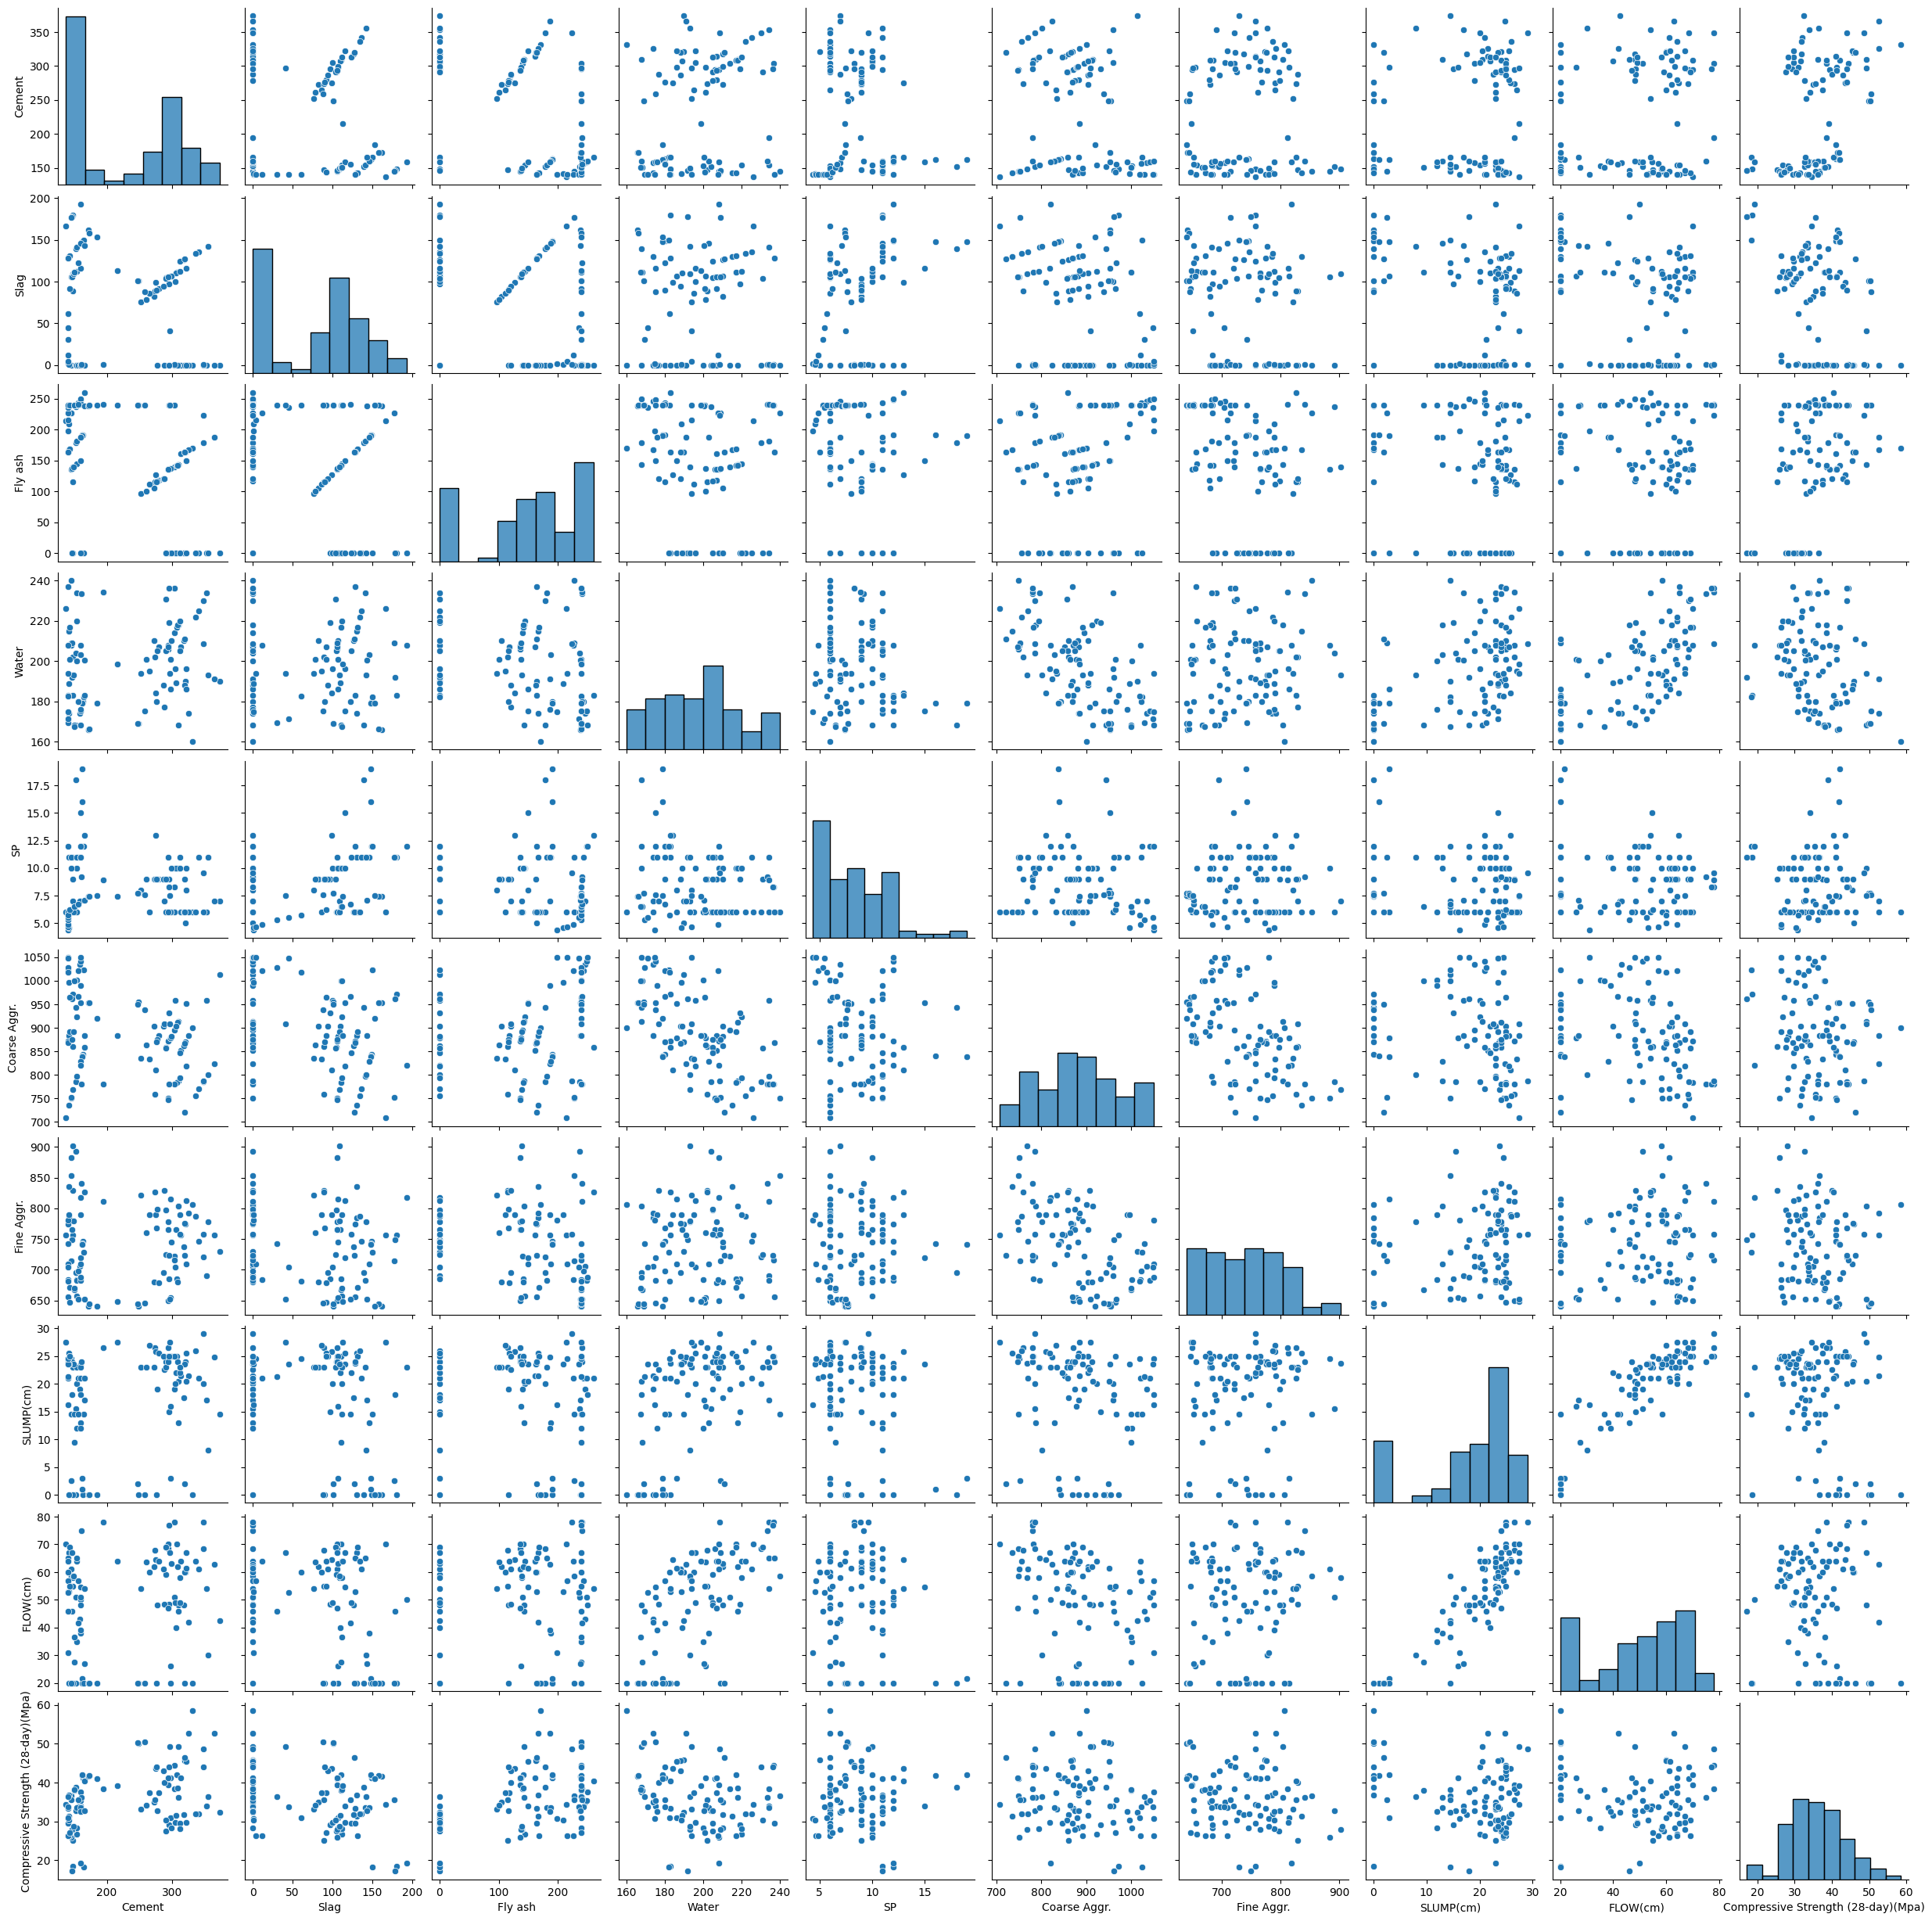

In [28]:
sns.pairplot(df);

<AxesSubplot:>

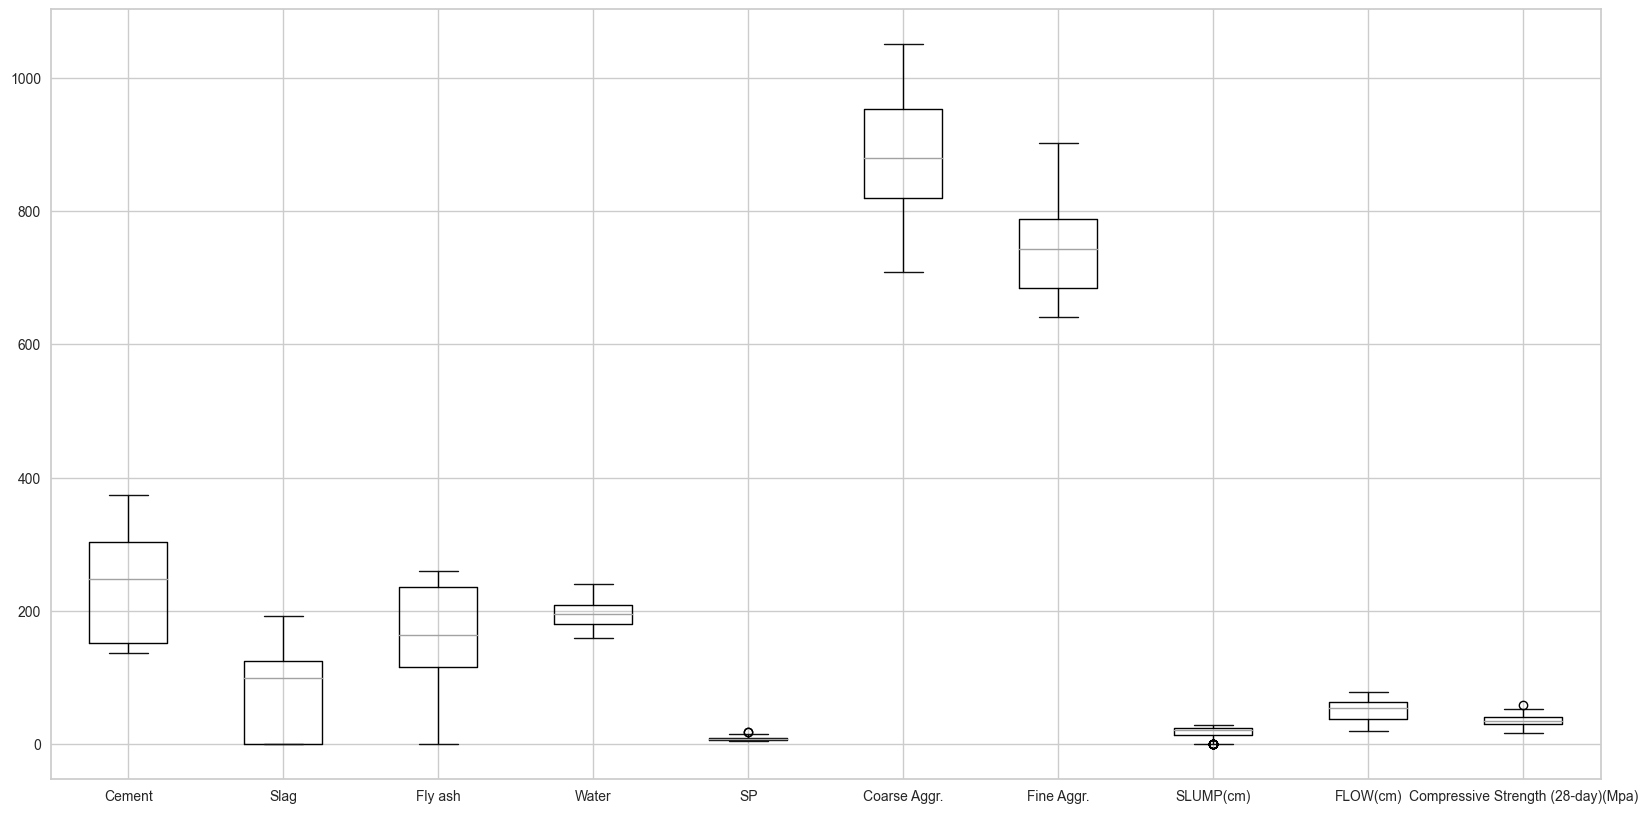

In [58]:
plt.figure(figsize =(20,10))
df.boxplot()

# Data Preprocessing 

### Features and target variable
* Split the data into features and target variable

In [13]:
X = df.drop(columns = "Compressive Strength (28-day)(Mpa)", axis = 1)
y = df["Compressive Strength (28-day)(Mpa)"]

In [14]:
X

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000
...,...,...,...,...,...,...,...,...,...
98,248.300,101.000,239.100,168.900,7.700,954.200,640.600,0.000,20.000
99,248.000,101.000,239.900,169.100,7.700,949.900,644.100,2.000,20.000
100,258.800,88.000,239.600,175.300,7.600,938.900,646.000,0.000,20.000
101,297.100,40.900,239.900,194.000,7.500,908.900,651.800,27.500,67.000


In [15]:
y

0     34.990
1     41.140
2     41.810
3     42.080
4     26.820
       ...  
98    49.970
99    50.230
100   50.500
101   49.170
102   48.700
Name: Compressive Strength (28-day)(Mpa), Length: 103, dtype: float64

### Splitting data into training and testing
* Split the data into training and testing sets

In [10]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Scaling
* import StandardScaler and scale the data. Use fit_transform() on the training set and transform() on the testing set to prevent data leakage.

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X_train)

StandardScaler()

In [20]:
X_train_scaled = scaler.transform(X_train)

In [21]:
X_test_scaled = scaler.transform(X_test)

##  1. Model Building (Linear Regression)
* Build a linear regression model, fit the model, and make predictions on the test and train set, and compare them.

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()

In [24]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [25]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

### 1.1 Interpret the model
* Interpret the model by looking at the coefficients

In [29]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 3.73690789 -2.84833966  3.20875858 -5.16495691 -0.05694117 -5.83872896
 -3.18557505 -2.41794917  1.51351431]


### 1.2 Model Evaluation
* Evaluate the model if it is appropriate to linear regression,to do so use residuals and R-squared.

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {
                model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
                "mae" : mean_absolute_error(y_train, y_train_pred),
                "mse" : mean_squared_error(y_train, y_train_pred),                          
                "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
                model_name+"_test": {"R2" : r2_score(y_test, y_pred),
                "mae" : mean_absolute_error(y_test, y_pred),
                "mse" : mean_squared_error(y_test, y_pred),
                "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
             }
    
    return pd.DataFrame(scores)

In [27]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.900,0.921
mae,1.992,1.716
mse,6.237,4.439
rmse,2.497,2.107


# 2. Regularization
* Regularize the model by adding a regularization term to the loss function.

## 2.1 Ridge (Apply and evaluate)
* Build a Ridge regression model, fit the model, and make predictions on the test and train set, and compare them.


In [30]:
from sklearn.linear_model import Ridge

In [31]:
ridge_model = Ridge(alpha=1)

In [32]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [33]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [34]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.899,0.922
mae,2.003,1.699
mse,6.313,4.398
rmse,2.513,2.097


## 2.2 Lasso (Apply and evalute)
* Build a Lasso regression model, fit the model, and make predictions on the test and train set, and compare them.

In [35]:
from sklearn.linear_model import Lasso

In [36]:
lasso_model = Lasso(alpha=1)

In [37]:
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1)

In [38]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [39]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.768,0.816
mae,3.016,2.588
mse,14.521,10.343
rmse,3.811,3.216


## 2.3 Elastic-Net (Apply and evaluate )

---

* Build an Elastic-Net regression model, fit the model, and make predictions on the test and train set, and compare them.
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [40]:
from sklearn.linear_model import ElasticNet

In [41]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5)

In [42]:
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1)

In [43]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [44]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es


,elastic_train,elastic_test
R2,0.625,0.625
mae,3.870,3.724
mse,23.448,21.153
rmse,4.842,4.599


In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
elastic_model = ElasticNet(max_iter=10000)

In [47]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [48]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2, return_train_score=True)

In [49]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01

[CV] END ............................alpha=0.2, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.2, l1_ratio=0.9; total time=   0.0s
[CV] END ...................

[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.7; total time=   0.0s
[CV] END ...................

[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.95; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END .............................alpha=1, l1_ratio=0.99; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [50]:
grid_model.best_params_

{'alpha': 0.012, 'l1_ratio': 0.1}

In [51]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.002,0.000,0.001,0.001,0.010,0.100,"{'alpha': 0.01, 'l1_ratio': 0.1}",-2.041,-3.397,-3.900,...,-2.355,-2.516,-2.600,-2.547,-2.429,-2.380,-2.486,-2.505,-2.480,0.079
1,0.001,0.000,0.001,0.001,0.010,0.500,"{'alpha': 0.01, 'l1_ratio': 0.5}",-2.044,-3.391,-3.918,...,-2.352,-2.512,-2.598,-2.545,-2.428,-2.377,-2.480,-2.504,-2.478,0.079
2,0.001,0.001,0.000,0.001,0.010,0.700,"{'alpha': 0.01, 'l1_ratio': 0.7}",-2.051,-3.387,-3.928,...,-2.351,-2.510,-2.597,-2.545,-2.427,-2.376,-2.476,-2.504,-2.476,0.079
3,0.000,0.000,0.000,0.000,0.010,0.900,"{'alpha': 0.01, 'l1_ratio': 0.9}",-2.064,-3.383,-3.937,...,-2.350,-2.506,-2.596,-2.544,-2.428,-2.374,-2.469,-2.504,-2.474,0.079
4,0.001,0.003,0.001,0.003,0.010,0.950,"{'alpha': 0.01, 'l1_ratio': 0.95}",-2.070,-3.382,-3.940,...,-2.350,-2.504,-2.596,-2.544,-2.428,-2.374,-2.466,-2.505,-2.474,0.079
5,0.002,0.004,0.000,0.000,0.010,0.990,"{'alpha': 0.01, 'l1_ratio': 0.99}",-2.076,-3.382,-3.942,...,-2.350,-2.503,-2.596,-2.544,-2.429,-2.373,-2.464,-2.505,-2.473,0.079
6,0.001,0.003,0.001,0.003,0.010,1,"{'alpha': 0.01, 'l1_ratio': 1}",-2.078,-3.381,-3.942,...,-2.350,-2.503,-2.596,-2.544,-2.429,-2.373,-2.463,-2.505,-2.473,0.079
7,0.002,0.004,0.000,0.000,0.012,0.100,"{'alpha': 0.012, 'l1_ratio': 0.1}",-2.036,-3.408,-3.889,...,-2.357,-2.519,-2.602,-2.549,-2.431,-2.383,-2.489,-2.507,-2.483,0.079
8,0.002,0.002,0.001,0.000,0.012,0.500,"{'alpha': 0.012, 'l1_ratio': 0.5}",-2.035,-3.400,-3.910,...,-2.354,-2.515,-2.599,-2.547,-2.429,-2.379,-2.484,-2.505,-2.480,0.079
9,0.001,0.000,0.000,0.000,0.012,0.700,"{'alpha': 0.012, 'l1_ratio': 0.7}",-2.040,-3.396,-3.922,...,-2.353,-2.512,-2.598,-2.546,-2.428,-2.378,-2.480,-2.505,-2.478,0.079


In [52]:
grid_model.best_index_

7

In [53]:
pd.DataFrame(grid_model.cv_results_).loc[7, ["mean_test_score", "mean_train_score"]]

mean_test_score    -2.888
mean_train_score   -2.483
Name: 7, dtype: object

In [54]:
y_pred = grid_model.predict(X_test_scaled) # ElasticNet(alpha=0.01, l1_ratio=0.1)
y_train_pred = grid_model.predict(X_train_scaled)

In [55]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.899,0.922
mae,2.001,1.693
mse,6.298,4.378
rmse,2.510,2.092


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___